In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Cleaning data
Eliminating duplicates and unnecessary columns. Merging DataFrames into one 

In [2]:
df_platform = pd.read_csv('Platforms.csv')
df_platform_nodups = df_platform.drop_duplicates()
df_platform_nodups.head()

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,1UWMRN-8NVCLI,PC
3,EHO5II-03X9PU,PS4
4,7C5ZAE-D1NCY9,XBox


In [3]:
df_player = pd.read_csv('players.csv')
df_player_nodups = df_player.drop_duplicates()
df_player_nodups = df_player_nodups.dropna()
df_player_nodups.head()

,user_id,trans_sum,game_cash
0,TWLWB9-L19SYJ,4.97,7050.0
1,SD0L4U-1JG4WN,1.98,4100.0
2,QZVG35-P8JKNU,1.98,5550.0
3,S2VBV4-ZKBHI6,4.97,8500.0
4,DDGKMQ-45SP8R,1.98,5200.0


In [4]:
df_abgroups = pd.read_csv('ABgroup.csv')
df_ab_nodups = df_abgroups.drop_duplicates()
df_ab_nodups.head()

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control


In [5]:
df_ab = pd.merge(df_player_nodups, df_ab_nodups, on = 'user_id', how = 'left')

In [6]:
df_merged_all = pd.merge(df_ab, df_platform_nodups, on = 'user_id', how = 'left')
df_merged_all.head()

,user_id,trans_sum,game_cash,group,platform
0,TWLWB9-L19SYJ,4.97,7050.0,test,PS4
1,SD0L4U-1JG4WN,1.98,4100.0,control,PC
2,QZVG35-P8JKNU,1.98,5550.0,test,PS4
3,S2VBV4-ZKBHI6,4.97,8500.0,test,PC
4,DDGKMQ-45SP8R,1.98,5200.0,control,XBox


# Defining key metrics for each platform
Finding mean, standart deviation, standard error of the mean, confidence intervals for each platform in test and control group

In [7]:
df_test = df_merged_all[df_merged_all['group'] == 'test']
df_contr = df_merged_all[df_merged_all['group'] == 'control']

In [8]:
df_contr['trans_sum'].describe()

count    539409.000000
mean          3.379586
std           1.839417
min           0.000000
25%           1.980000
50%           2.980000
75%           4.950000
max          14.940000
Name: trans_sum, dtype: float64

In [9]:
df_test['trans_sum'].describe()

count    538661.000000
mean          3.575025
std           1.908338
min           0.000000
25%           1.980000
50%           2.980000
75%           4.960000
max          14.940000
Name: trans_sum, dtype: float64

In [10]:
def my_norm_confidence(df, column = 'trans_sum', alpha = 0.95):
    mean = df[column].mean()
    std = df[column].std()
    interval = stats.norm.interval(alpha, loc = mean, scale = std)
    return interval

confidence = my_norm_confidence(df_test)
print('Confidence intervals of test group:', confidence)
confidence = my_norm_confidence(df_contr)
print('Confidence intervals of control group:', confidence)

Confidence intervals of test group: (-0.16524951476089234, 7.315298580871115)
Confidence intervals of control group: (-0.22560522229886937, 6.984777242046405)


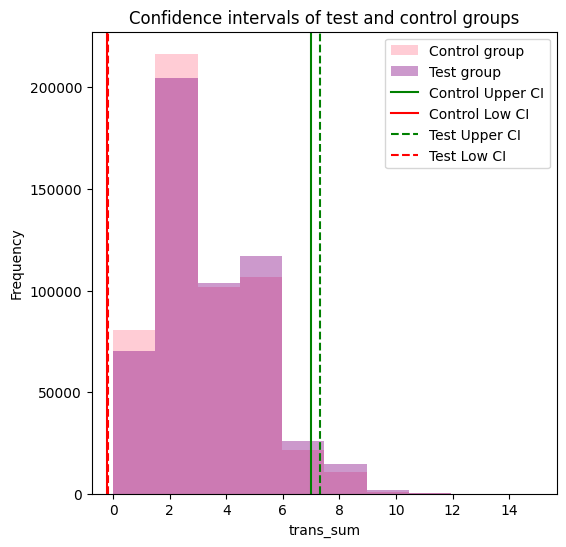

In [11]:
plt.figure(figsize =(6, 6))
plt.hist(df_contr['trans_sum'],color = 'pink', alpha = 0.8, label = 'Control group')
plt.hist(df_test['trans_sum'],color = 'purple', alpha = 0.4, label = 'Test group')

plt.axvline(x = 6.984777242046405, color = 'green', linestyle = '-', label = 'Control Upper CI')
plt.axvline(x = -0.22560522229886937, color = 'red', linestyle = '-', label = 'Control Low CI')
plt.axvline(x = 7.315298580871115, color = 'green', linestyle = '--', label = 'Test Upper CI')
plt.axvline(x = -0.16524951476089234, color = 'red', linestyle = '--', label = 'Test Low CI')

plt.xlabel('trans_sum')
plt.ylabel('Frequency')
plt.title('Confidence intervals of test and control groups')
plt.legend()
plt.show()


### According to the diagram, the confidence intervals (CIs) for the control and test groups overlap significantly.

### Based on the metrics the percentiles and range (min to max) are quite similar between the two datasets, suggesting that the overall distributions of trans_sum are alike. Also there is a slight difference in means, with test dataset having a slightly higher average trans_sum and slightly higher variability (standard deviation) compared to control dataset.

# Metrics of test & control platforms

In [12]:
platform_names = df_test['platform'].unique()
platform_names

array(['PS4', 'PC', 'XBox'], dtype=object)

In [13]:
test_metrics = {}
control_metrics = {}

for platform in platform_names:
    platform_data = df_test[df_test['platform'] == platform]['trans_sum']
    test_metrics[platform] = {
        'mean': platform_data.mean(),
        'std': platform_data.std(),
        'length': len(platform_data),
        'sem': platform_data.std() / (len(platform_data) * 0.05),
        'confidence': stats.norm.interval(0.95, loc = platform_data.mean(), scale = platform_data.std())     
    }

    

for platform in platform_names:
    platform_data = df_contr[df_contr['platform'] == platform]['trans_sum']
    control_metrics[platform] = {
        'mean': platform_data.mean(),
        'std': platform_data.std(),
        'length': len(platform_data),
        'sem': platform_data.std() / (len(platform_data) * 0.05),
        'confidence': stats.norm.interval(0.95, loc = platform_data.mean(), scale = platform_data.std())
    }

In [14]:
for key, metrics in control_metrics.items():
    print('\033[1mMetrics for control platform', key, '\033[0m')
    print('Mean: ', metrics['mean'])
    print('Std: ', metrics['std'])
    print('Length: ', metrics['length'])
    print('Sem: ', metrics['sem'])
    print('Confidence interval: ', metrics['confidence'],'\n')

Metrics for control platform PS4 
Mean:  3.3287888961266723
Std:  1.82767716412838
Length:  179613
Sem:  0.0002035127929635806
Confidence interval:  (-0.25339252093125353, 6.910970313184598) 

Metrics for control platform PC 
Mean:  3.2695846723662583
Std:  1.7820575589573666
Length:  179545
Sem:  0.00019850818000583325
Confidence interval:  (-0.2231839615675444, 6.762353306300061) 

Metrics for control platform XBox 
Mean:  3.5397738154018557
Std:  1.8955262358611495
Length:  180251
Sem:  0.00021032074561152497
Confidence interval:  (-0.1753893386367733, 7.254936969440484) 



In [15]:
for key, metrics in test_metrics.items():
    print('\033[1mMetrics for test platform', key, '\033[0m')
    print('Mean: ', metrics['mean'])
    print('Std: ', metrics['std'])
    print('Length: ', metrics['length'])
    print('Sem: ', metrics['sem'])
    print('Confidence interval: ', metrics['confidence'],'\n')

Metrics for test platform PS4 
Mean:  3.536750638858201
Std:  1.8857784464547378
Length:  179226
Sem:  0.00021043581248867213
Confidence interval:  (-0.1593071990149797, 7.232808476731382) 

Metrics for test platform PC 
Mean:  3.6347431613650527
Std:  1.926302476836559
Length:  179568
Sem:  0.0002145485249973892
Confidence interval:  (-0.1407403165649046, 7.41022663929501) 

Metrics for test platform XBox 
Mean:  3.5535426731974176
Std:  1.911237906783632
Length:  179867
Sem:  0.00021251679371798405
Confidence interval:  (-0.19241478998622208, 7.299500136381058) 



### General analysis:
### The test groups on all platforms have higher Mean values compared to the control groups, which may indicate the impact of the changes being tested. The standard deviation and wide confidence intervals indicate significant variability in the data. A large number of observations (Length) makes the samples representative, and low values of the standard error of the mean indicate high accuracy in estimating the mean.

# Analysis of each platform's CI

In [16]:
pc_test = df_test[df_test['platform'] == 'PC']['trans_sum'].reset_index()
ps_test = df_test[df_test['platform'] == 'PS4']['trans_sum'].reset_index()
xbox_test = df_test[df_test['platform'] == 'XBox']['trans_sum'].reset_index()

In [17]:
pc_contr = df_contr[df_contr['platform'] == 'PC']['trans_sum'].reset_index()
ps_contr = df_contr[df_contr['platform'] == 'PS4']['trans_sum'].reset_index()
xbox_contr = df_contr[df_contr['platform'] == 'XBox']['trans_sum'].reset_index()

In [18]:
platforms_data = {
    'PC': {
        'test': pc_test,
        'control': pc_contr,
        'test_confidence': test_metrics['PC']['confidence'],
        'control_confidence': control_metrics['PC']['confidence']
    },
    'PS4': {
        'test': ps_test,
        'control': ps_contr,
        'test_confidence': test_metrics['PS4']['confidence'],
        'control_confidence': control_metrics['PS4']['confidence']
    },
    'XBox': {
        'test': xbox_test,
        'control': xbox_contr,
        'test_confidence': test_metrics['XBox']['confidence'],
        'control_confidence': control_metrics['XBox']['confidence']
    }
}

Confidence level for PC overlaps


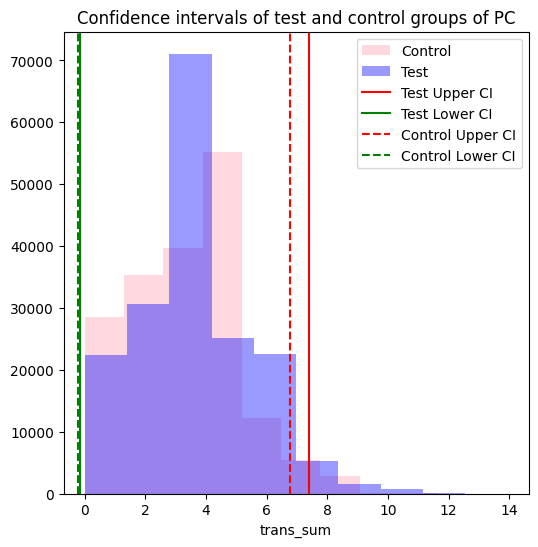

Confidence level for PS4 overlaps


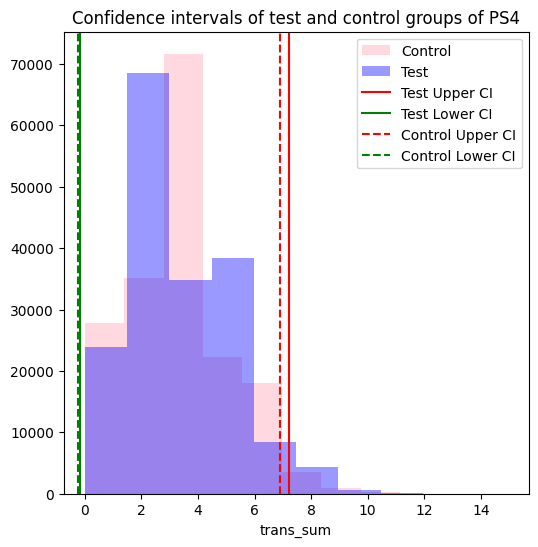

Confidence level for XBox overlaps


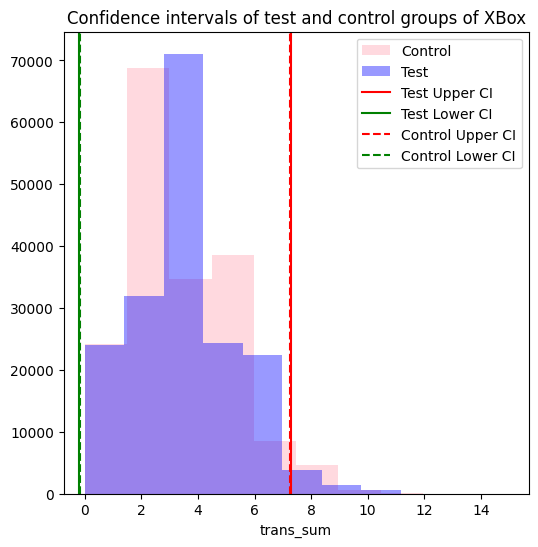

In [19]:
for platform, data in platforms_data.items():
    low_num = (data['test_confidence'][0], data['control_confidence'][0])
    upper_num = (data['test_confidence'][1], data['control_confidence'][1])
    if max(low_num) <= min(upper_num):
        print(f'\033[1mConfidence level for {platform} overlaps\033[1m')
    else:
        print(f"\033[Confidence level for {platform} doesn't overlap\033[")

    plt.figure(figsize =(6, 6))
    plt.hist(data['control']['trans_sum'], color='pink', alpha=0.6, label='Control')
    plt.hist(data['test']['trans_sum'], color='blue', alpha=0.4, label='Test')
    
    plt.axvline(x=data['test_confidence'][1], color='red', linestyle='-', label='Test Upper CI')
    plt.axvline(x=data['test_confidence'][0], color='green', linestyle='-', label='Test Lower CI')
    plt.axvline(x=data['control_confidence'][1], color='red', linestyle='--', label='Control Upper CI')
    plt.axvline(x=data['control_confidence'][0], color='green', linestyle='--', label='Control Lower CI')
    
    plt.xlabel('trans_sum')
    plt.title(f'Confidence intervals of test and control groups of {platform}')
    plt.legend()
    plt.show()

### Based on the analysis, the overlapping confidence intervals for each platform indicate that there is no statistically significant difference between them. This suggests that the promotion did not lead to distinguishable changes in transaction sums across the platforms.